# 1. Introduction

# Capstone Project: Addiction Analysis

Objective:
To explore demographic, lifestyle, and health factors associated
with cigarette and alcohol addiction levels.


# 2. Data Overview
Shape, types, missing values


In [1]:
import pandas as pd
df = pd.read_csv("../data/cleaned/addiction_population_clean.csv")
print("Shape:", df.shape)
df.head()

Shape: (2295, 25)


,id,name,age,gender,country,city,education_level,employment_status,annual_income_usd,marital_status,...,attempts_to_quit_smoking,attempts_to_quit_drinking,has_health_issues,mental_health_status,exercise_frequency,diet_quality,sleep_hours,bmi,social_support,therapy_history
0,1,Michael Bates,66,Other,Yemen,Martinmouth,Secondary,Student,45595,Married,...,6,2,True,Good,Daily,Average,5.6,22.4,Unknown,Current
1,2,Brian Thompson,29,Male,Saudi Arabia,Harperhaven,Primary,Self-Employed,145842,Single,...,1,6,False,Poor,Weekly,Good,6.7,24.1,Moderate,NaN
2,3,Steven Little,75,Male,Togo,Chanport,Postgraduate,Unemployed,162480,Single,...,9,9,True,Good,Never,Good,6.2,22.2,Weak,NaN
3,5,Nicholas Sanchez,38,Female,Morocco,Danielberg,College,Self-Employed,62933,In a relationship,...,4,7,True,Poor,Weekly,Good,8.5,31.2,Weak,Past
4,7,Jessica Riley MD,36,Male,Saint Kitts and Nevis,Christopherstad,College,Self-Employed,20491,Widowed,...,4,9,False,Good,Weekly,Good,4.5,32.6,Moderate,Past


In [3]:
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         2295 non-null   int64  
 1   name                       2295 non-null   str    
 2   age                        2295 non-null   int64  
 3   gender                     2295 non-null   str    
 4   country                    2295 non-null   str    
 5   city                       2295 non-null   str    
 6   education_level            1978 non-null   str    
 7   employment_status          2295 non-null   str    
 8   annual_income_usd          2295 non-null   int64  
 9   marital_status             2295 non-null   str    
 10  children_count             2295 non-null   int64  
 11  smokes_per_day             2295 non-null   int64  
 12  drinks_per_week            2295 non-null   float64
 13  age_started_smoking        2295 non-null   int64  
 14  age

,id,age,annual_income_usd,children_count,smokes_per_day,drinks_per_week,age_started_smoking,age_started_drinking,attempts_to_quit_smoking,attempts_to_quit_drinking,sleep_hours,bmi
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,1501.961656,53.683224,99339.266667,2.460131,10.023094,4.954466,23.669717,23.581699,4.427015,4.545098,6.493824,25.224553
std,869.244867,15.392322,57877.428120,1.701338,3.051989,2.157486,8.628324,8.509096,2.849886,2.870883,1.489995,4.957261
min,1.000000,15.000000,674.000000,0.000000,2.000000,0.000000,10.000000,10.000000,0.000000,0.000000,2.437500,12.150000
25%,750.500000,42.000000,49225.000000,1.000000,8.000000,3.000000,16.000000,16.000000,2.000000,2.000000,5.500000,22.000000
50%,1498.000000,54.000000,99819.000000,2.000000,10.000000,5.000000,23.000000,23.000000,4.000000,5.000000,6.500000,25.300000
75%,2267.500000,67.000000,149531.500000,4.000000,12.000000,6.000000,31.000000,31.000000,7.000000,7.000000,7.500000,28.400000
max,3000.000000,79.000000,199951.000000,5.000000,18.000000,10.500000,39.000000,39.000000,9.000000,9.000000,10.537500,38.150000


In [4]:
# Check outliers

numeric_cols = df.select_dtypes(include="number").columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")

id: 0 outliers
age: 0 outliers
annual_income_usd: 0 outliers
children_count: 0 outliers
smokes_per_day: 0 outliers
drinks_per_week: 0 outliers
age_started_smoking: 0 outliers
age_started_drinking: 0 outliers
attempts_to_quit_smoking: 0 outliers
attempts_to_quit_drinking: 0 outliers
sleep_hours: 14 outliers
bmi: 22 outliers


# 3. Feature Engineering

Addiction score & categories


In [5]:
df["addiction_score"] = df["smokes_per_day"] + df["drinks_per_week"]

df["addiction_level"] = pd.cut(
    df["addiction_score"],
    bins=[0, 10, 25, df["addiction_score"].max()],
    labels=["Low", "Medium", "High"],
)
df[["addiction_score", "addiction_level"]].head()

,addiction_score,addiction_level
0,9.0,Low
1,14.0,Medium
2,17.0,Medium
3,10.0,Low
4,14.0,Medium


# 4 First Visualizations (Univariate)

Distributions


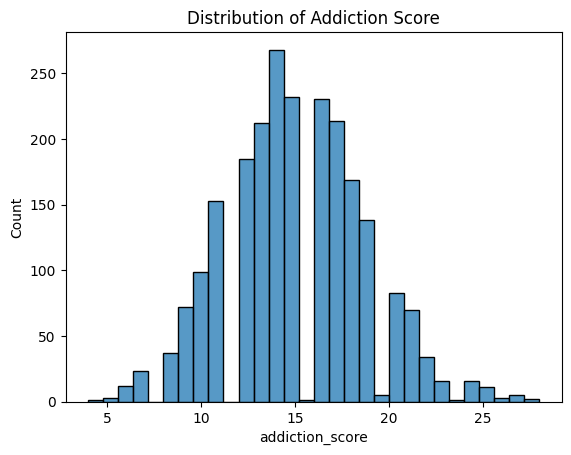

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["addiction_score"], bins=30)
plt.title("Distribution of Addiction Score")
plt.savefig("../visuals/distribution_of_addiction_score.png", bbox_inches="tight")
plt.show()

# 5. First Analytical Insight


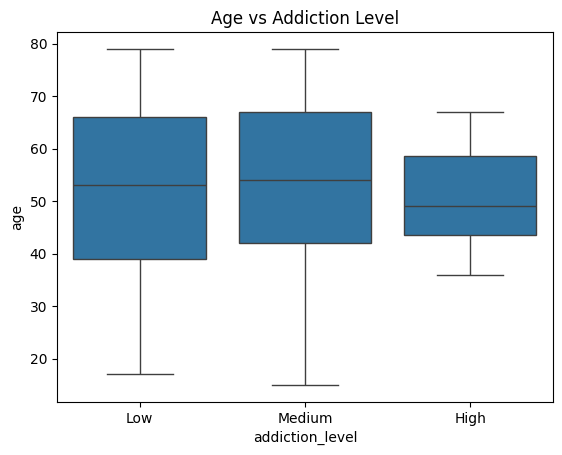

In [8]:
sns.boxplot(x="addiction_level", y="age", data=df)
plt.title("Age vs Addiction Level")
plt.savefig("../visuals/age_vs_addiction_level.png", bbox_inches="tight")
plt.show()

# 6. Bivariate Analysis

Relationships between variables, not just distributions.


In [9]:
# ======================
# Correlation Analysis
# ======================

numeric_cols = df.select_dtypes(include="number")

corr_matrix = numeric_cols.corr()

corr_matrix.head()

,id,age,annual_income_usd,children_count,smokes_per_day,drinks_per_week,age_started_smoking,age_started_drinking,attempts_to_quit_smoking,attempts_to_quit_drinking,sleep_hours,bmi,addiction_score
id,1.000000,-0.020382,-0.019582,-0.018895,-0.002893,0.007317,-0.008501,-0.024761,0.019588,-0.011328,0.036425,0.014182,0.001889
age,-0.020382,1.000000,0.003607,0.026726,0.043324,0.046283,0.139487,0.134252,0.036286,0.016822,-0.001242,-0.042580,0.063026
annual_income_usd,-0.019582,0.003607,1.000000,-0.015581,-0.024587,-0.015703,-0.025970,-0.006677,-0.009133,0.039055,0.004220,-0.014067,-0.029579
children_count,-0.018895,0.026726,-0.015581,1.000000,-0.011534,-0.010797,-0.033058,0.006436,-0.033349,-0.005054,0.003254,-0.015024,-0.015886
smokes_per_day,-0.002893,0.043324,-0.024587,-0.011534,1.000000,-0.031154,-0.001481,0.019390,0.012348,0.004931,0.003843,-0.041628,0.810580


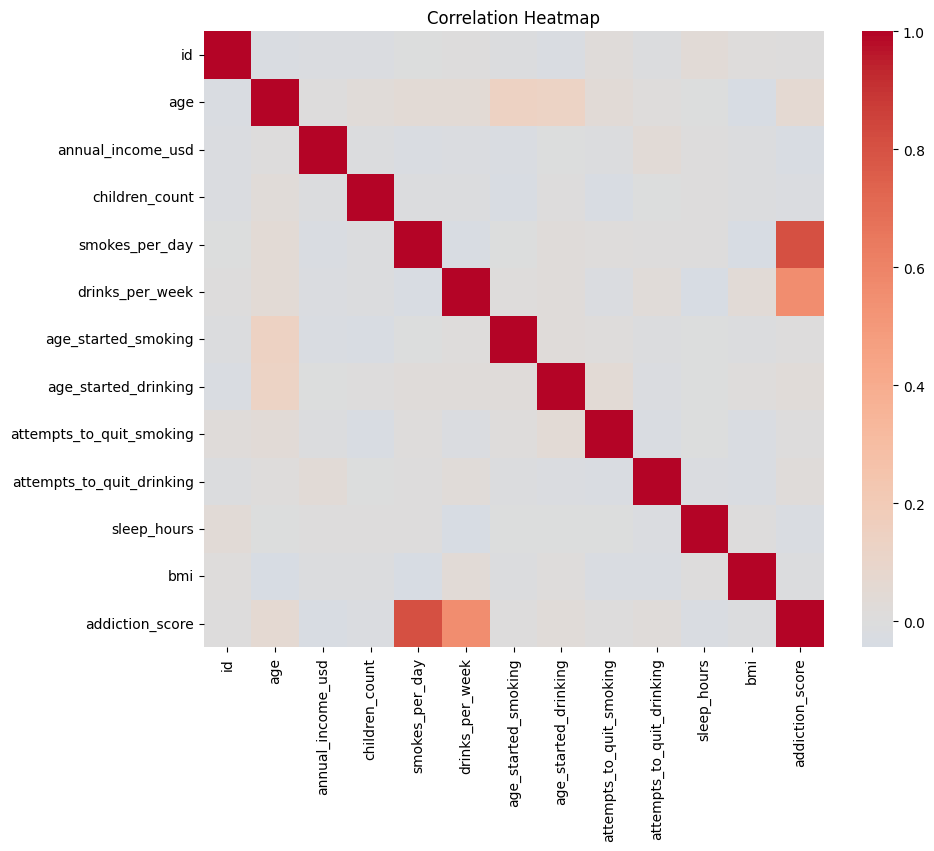

In [10]:
# Visualize Correlation Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.savefig("../visuals/correlation_heatmap.png", bbox_inches="tight")
plt.show()

# 7. Addiction vs Lifestyle Factors


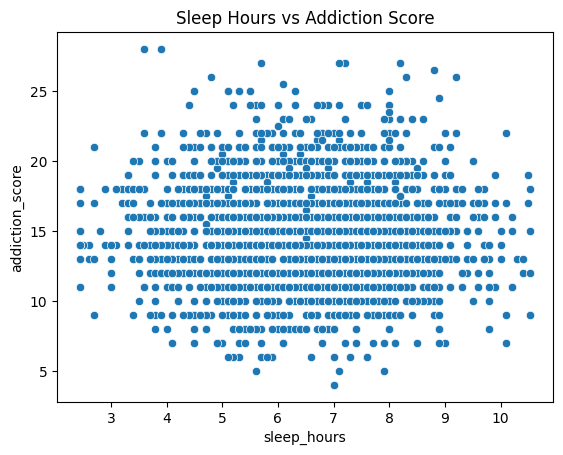

In [11]:
# Sleep vs Addiction

sns.scatterplot(x="sleep_hours", y="addiction_score", data=df)
plt.title("Sleep Hours vs Addiction Score")
plt.savefig("../visuals/sleep_hours_vs_addiction_score.png", bbox_inches="tight")
plt.show()

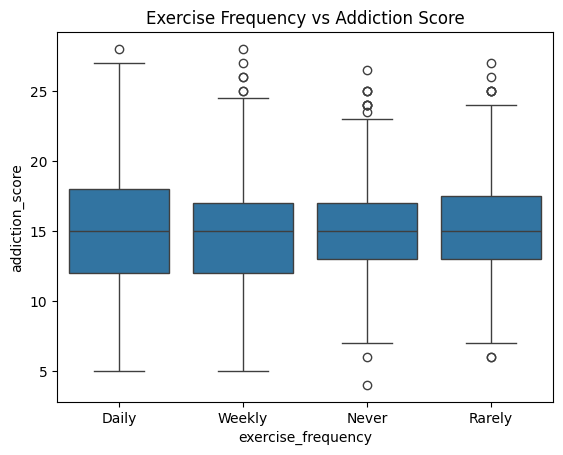

In [12]:
# Exercise vs Addiction

sns.boxplot(x="exercise_frequency", y="addiction_score", data=df)
plt.title("Exercise Frequency vs Addiction Score")
plt.show()

# 8. Demographics vs Addiction


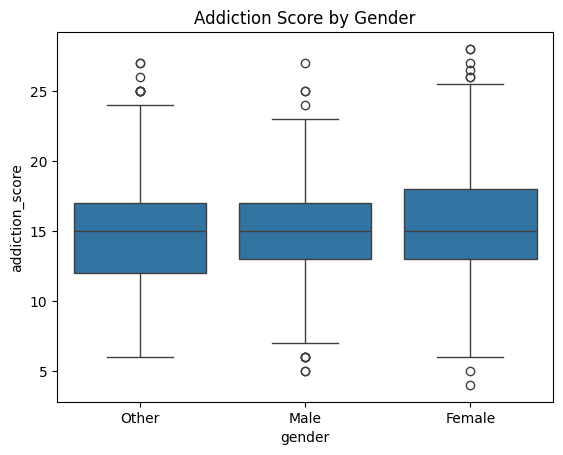

In [13]:
# Gender Comparison

sns.boxplot(x="gender", y="addiction_score", data=df)
plt.title("Addiction Score by Gender")
plt.savefig("../visuals/addiction_score_by_gender.png", bbox_inches="tight")
plt.show()

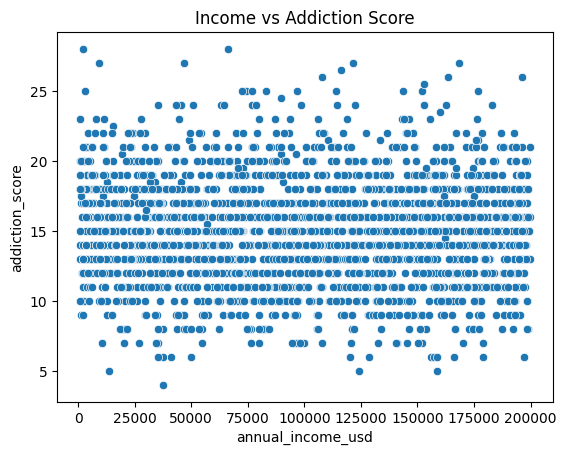

In [14]:
# Income Relationship

sns.scatterplot(x="annual_income_usd", y="addiction_score", data=df)
plt.title("Income vs Addiction Score")
plt.savefig("../visuals/income_vs_addiction_score.png", bbox_inches="tight")
plt.show()

# 9. Health Factors


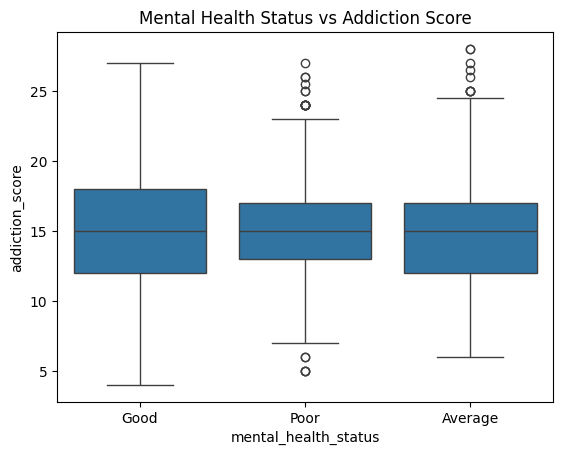

In [15]:
# Health Factors

sns.boxplot(x="mental_health_status", y="addiction_score", data=df)
plt.title("Mental Health Status vs Addiction Score")
plt.savefig("../visuals/mental_health_vs_addiction_score.png", bbox_inches="tight")
plt.show()

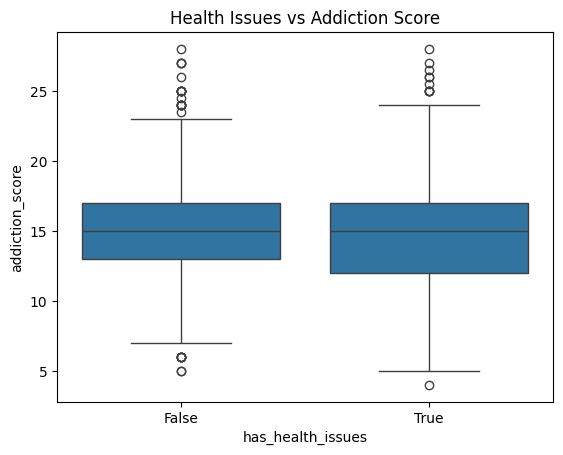

In [16]:
# Health Issues

sns.boxplot(x="has_health_issues", y="addiction_score", data=df)
plt.title("Health Issues vs Addiction Score")
plt.show()

### 📊 Exploratory Data Analysis Insights

👥 Demographic Patterns
The dataset represents a relatively young population, with most individuals concentrated in early adulthood. Gender distribution is balanced across Male, Female, and Other categories, allowing for unbiased behavioral comparisons.

🚬 Smoking Behavior
Smoking frequency varies widely, but most individuals fall within a moderate daily consumption range. A small group of heavy smokers was identified and treated as outliers, indicating a minority with potentially higher health risks.

🍺 Alcohol Consumption
Alcohol consumption shows higher variability than smoking. Weekly drinking patterns suggest lifestyle influence, with certain individuals reporting very high consumption levels, which were capped during preprocessing to avoid skewed analysis.

🧠 Mental Health & Addiction
A noticeable pattern emerges where individuals with poorer mental health status tend to report:
•	Higher smoking frequency
•	Higher drinking frequency
This suggests a potential behavioral association between mental health challenges and substance dependence.

🏃 Lifestyle & Health Indicators
Lifestyle variables reveal meaningful relationships:
•	Lower exercise frequency aligns with higher BMI
•	Poor diet quality correlates with reduced sleep hours
•	Strong social support associates with healthier behaviors
These patterns highlight the importance of social and lifestyle factors in addiction-related outcomes.

💰 Socioeconomic Influence
Income shows moderate dispersion across the population. While not a strong predictor alone, combined analysis suggests that employment status and income stability may influence consumption habits.

🧾 Overall Conclusion
The exploratory analysis indicates that addiction behaviors are multifactorial, influenced by mental health, lifestyle, and social environment rather than a single demographic variable.